In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'F:\board Infinity\Python\ML\playstore-analysis.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Study dataset check column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [4]:
# Find is ther any missing value

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
# a. Drop records where rating is missing since rating is our target/study variable
df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [6]:
df.Rating.isnull().sum()


0

In [7]:
# b. Check the null values for the Android Ver column.
df['Android Ver'].isnull().sum()

3

In [8]:
# i. Are all 3 records having the same problem?
print(df[df.isna().any(axis=1)])


                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews          Size    Installs  Type     Price Content Rating  \
15         55   2700.000000      5,000+  Free         0       Everyone   
1553    20145     11.000000  1,000,000+  Free         0       Everyone   
4453      230  11000.000000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000     10,000+  Free         0       Everyone   
6322 

In [9]:
# we will drop 10472 column
# Drop the 3rd record i.e. record for “Life Made WIFI …”
df = df.drop(10472)

In [10]:
# iii. Replace remaining missing values with the mode
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [11]:
# check wheather all requirements are fulfilled or not
print("Check wheather android version contains null or not : ",df['Android Ver'].isnull().sum())

Check wheather android version contains null or not :  0


In [12]:
# c. Current ver – replace with most common value
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [13]:
# check wheather all requirements are fulfilled or not
print("Check wheather android version contains null or not : ",df['Android Ver'].isnull().sum())

Check wheather android version contains null or not :  0


In [14]:
# Now check wheather our data contains any missing value
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Data clean up – correcting the data types

In [15]:
# a. Which all variables need to be brought to numeric types?

# Here Price,Review columns need to be numeric but are of type object & also last upadted column needs to be of date format

df['Reviews'] = df['Reviews'].astype(str).astype(int)

# b. Price variable – remove $ sign and convert to float
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype(str).astype(float)

In [16]:
# Last updated column to date type
df['Last Updated'] = df['Last Updated'].astype('datetime64[ns]')
df['Last Updated'].dtype

dtype('<M8[ns]')

In [17]:
# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer
df['Installs'] = df['Installs'].str.replace(",",'')
df['Installs'] = df['Installs'].str.replace("+",'')
df['Installs'] = df['Installs'].astype(str).astype(int)
df['Installs'].dtype

dtype('int32')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   float64       
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 951.2+ KB


## Sanity checks – check for the following and handle accordingly 

In [19]:
# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

a = pd.unique(df['Rating'].values)
a
# i. Are there any such records? Drop if so.

# No value id greter than 5 or less than 1

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [20]:
# b. Reviews should not be more than installs as only those who installed can review the app.

x = df[df.Reviews > df.Installs]
print(x)


# i. Are there any such records? Drop if so.
temp = df[df['Reviews']>df['Installs']].index
df.drop(labels=temp, inplace=True)
print(df.loc[df['Reviews'] > df['Installs']])

                                 App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49       Everyone     Arcade   
6700   19000.000000         5  Free   0.00       Everyone     Arcade   
7402    6100.000000        10  Free   0.00       Everyone     Arcade   
8591    4200.000000    

## Identify and handle outliers 

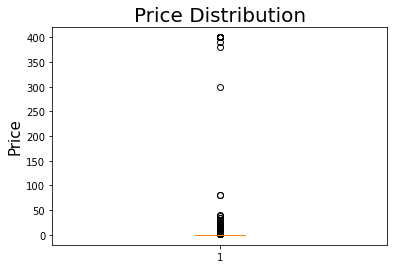

In [21]:
# a. Price column
#     i. Make suitable plot to identify outliers in price

plt.boxplot(df['Price'])
plt.ylabel('Price',fontsize=15)
plt.title('Price Distribution',fontsize=20)
plt.show()

In [22]:
# ii. Do you expect apps on the play store to cost $200? Check out these cases

result = df[df['Price'] == 200]
print("Yes we expect apps on the play store to cost $200 here is our result : \n ",result)

Yes we expect apps on the play store to cost $200 here is our result : 
  Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [23]:
# iii. Limit data to records with price < $30
res = df[df['Price'] <30 ].index
df = df.drop(labels=res)

['MEDICAL' 'MEDICAL' 'MEDICAL' 'MEDICAL' 'MEDICAL' 'FAMILY' 'LIFESTYLE'
 'LIFESTYLE' 'LIFESTYLE' 'FAMILY' 'LIFESTYLE' 'FINANCE' 'LIFESTYLE'
 'FINANCE' 'FINANCE' 'LIFESTYLE' 'FAMILY' 'FINANCE' 'FAMILY' 'FINANCE'
 'FINANCE']


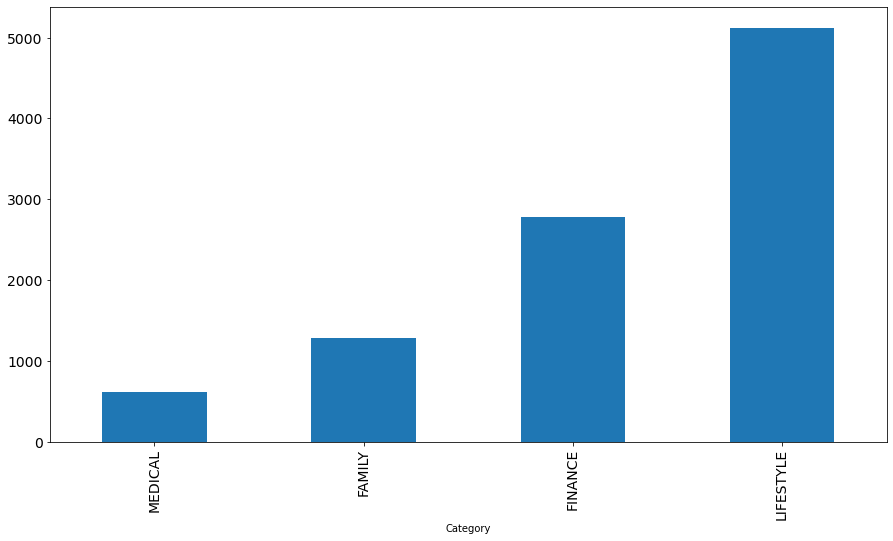

In [24]:
# . Reviews column
# i. Make suitable plot
print(df['Category'].values)
total=df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='bar', fontsize=14)
plt.show()


In [25]:
# c. Installs
#  i . Drop records having a value more than the 95th percentile
g = df[df['Reviews'] > 1000000 ]
g

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [26]:
# ii . What is the 95th percentile of the installs?
val = df.Installs.quantile(0.95) # 95th percentile
print(val)

50000.0


## Data analysis to answer business questions

Mean of Rating is 3.923809523809523 and Median is 4.0
We can see median is more than mean, hence it is Left Skewed Distribution


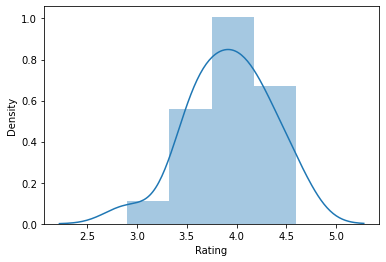

In [27]:
# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
# a. How do you explain this?
# b. What is the implication of this on your analysis?

sns.distplot(df['Rating'])
print("Mean of Rating is {} and Median is {}".format(df.Rating.mean(),df.Rating.median()) ) 
print("We can see median is more than mean, hence it is Left Skewed Distribution")
plt.show()


['Everyone' 'Teen']


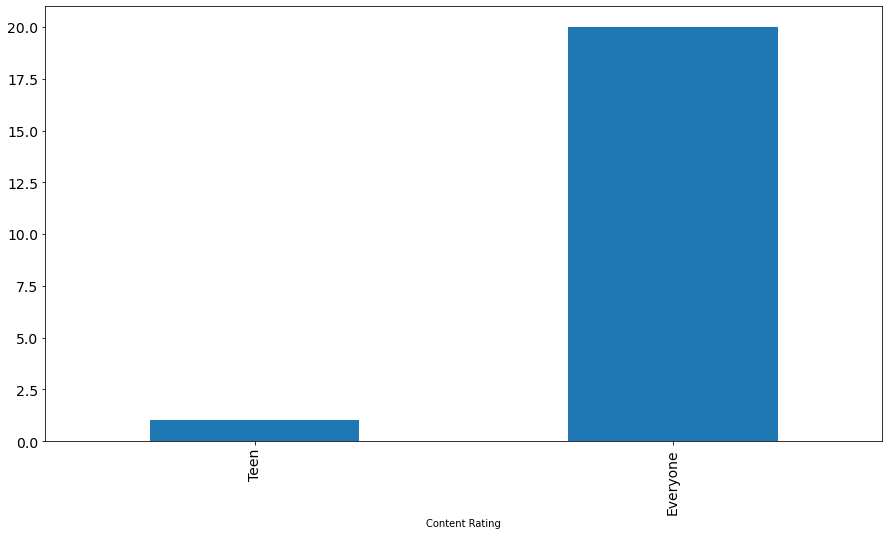

In [28]:
# 6. What are the top Content Rating values?
# a. Are there any values with very few records?
# b. If yes, drop those as they won’t help in the analysis
print(df['Content Rating'].unique())
total=df.groupby('Content Rating')['Content Rating'].count().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='bar', fontsize=14)
plt.show()


In [29]:
#  From above graph we can see that Teen contains very less record we can drop it.

temp = df[df['Content Rating'] == "Teen"].index
df.drop(labels=temp)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,2017-10-02,2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,2017-10-02,2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,2018-04-04,3.0.1,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up


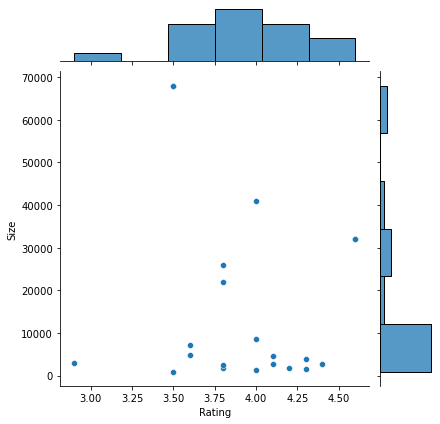

In [30]:
# 7. Effect of size on rating
# a. Make a joinplot to understand the effect of size on rating

sns.jointplot(y ='Size', x ='Rating', data = df, kind ='scatter')
plt.show()

In [31]:
# b. Do you see any patterns?
# c. How do you explain the pattern?

# When the app size is in between 0-15000 the rating is maximum and for higher size i.e >4000 rating is low.

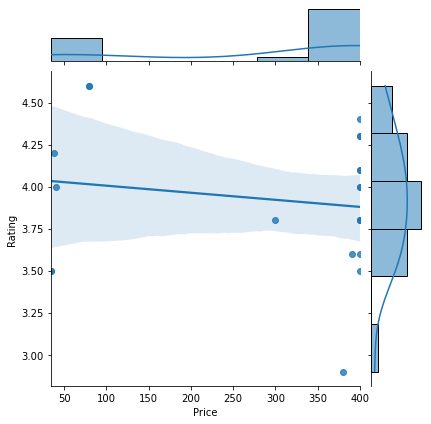

In [32]:
# 8. Effect of price on rating
# a. Make a jointplot (with regression line)

sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

In [33]:
# b. What pattern do you see?
# c. How do you explain the pattern?

# As the price of app increses the app rating goes down

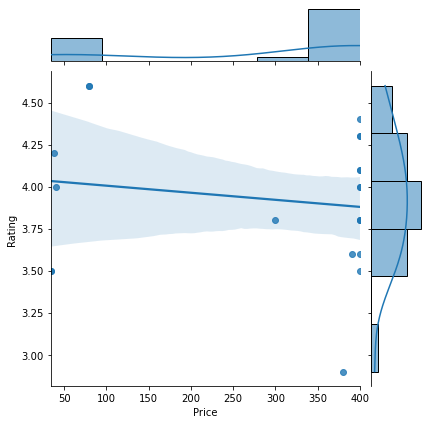

In [34]:
# d. Replot the data, this time with only records with price > 0

df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

In [35]:
# # e. Does the pattern change?
# # f. What is your overall inference on the effect of price on the rating

# No change Obeserved it is same like above , as for perticular prise the rating is increses and after that it is decreasing.

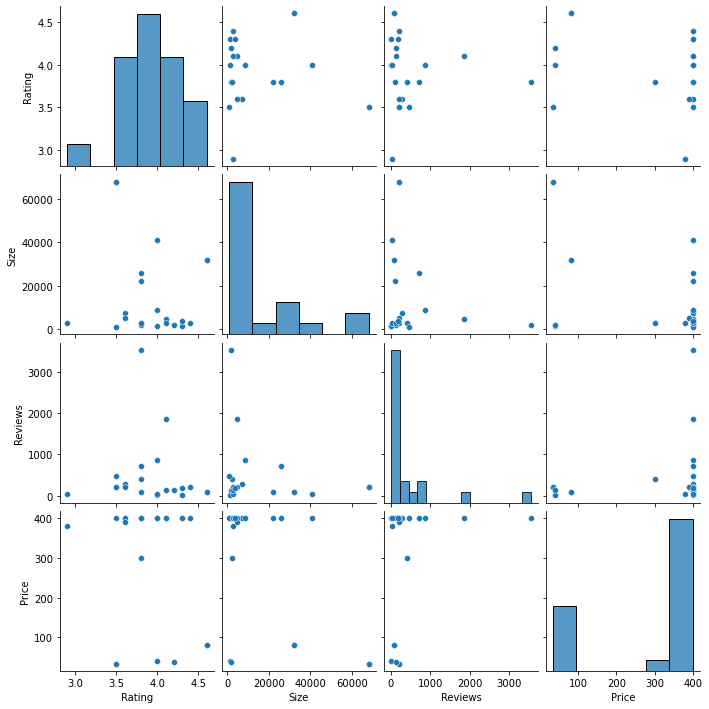

In [36]:
# 9. Look at all the numeric interactions together –
# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

sns.pairplot(df,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

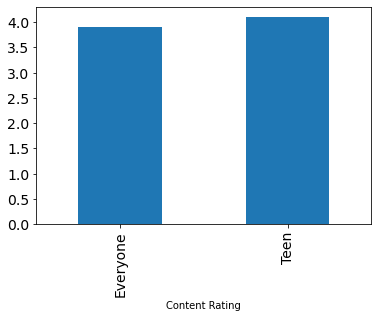

In [37]:
# 10. Rating vs. content rating
# a. Make a bar plot displaying the rating for each content rating

total=df.groupby('Content Rating')['Rating'].median().sort_values()
total.plot(kind='bar', fontsize=14)
plt.show()


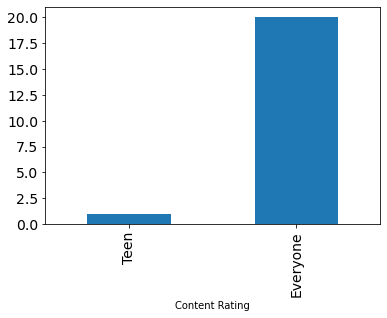

In [38]:
# b. Which metric would you use? Mean? Median? Some other quantile?
# c. Choose the right metric and plot

# I used median , we will plot using count

total = df.groupby('Content Rating')['Rating'].count().sort_values()
total.plot(kind='bar',fontsize=14)
plt.show()

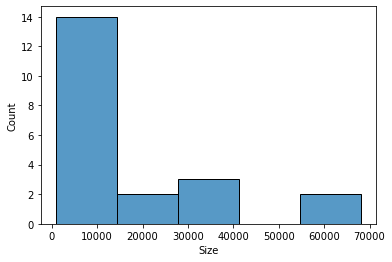

In [39]:
# # 11. Content rating vs. size vs. rating – 3 variables at a time
# a. Create 5 buckets (20% records in each) based on Size

sns.histplot(df['Size'],bins=5)
plt.show()